<a href="https://colab.research.google.com/github/kanishk16/First-Step-to-Computer-Vision/blob/master/OpenCV_with_Python_08.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
# neccessary imports
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt
from google.colab.patches import cv2_imshow as cv_imshow

# version check
cv.__version__

'3.4.3'

In [0]:
## Creating a function to download img from a url specified by the USER
import urllib.request as urlrequest

def dl_img(url, file_path, file_name):
  _path = file_path + file_name + '.jpg'
  urlrequest.urlretrieve(url, _path)
  
url = input("URL: ")
saveas = input("File Name: ")

dl_img(url, '/content/', saveas)

# https://cdn.shopify.com/s/files/1/1893/0477/products/5PCS_Framed_Colorful_Lion_Canvas_Prints_grande.png?v=1504331897
# https://www.artgalleryofhamilton.com/wp-content/uploads/2018/04/abstract-painting.jpg
# https://pythonprogramming.net/static/images/opencv/bookpage.jpg
# https://matplotlib.org/3.1.1/_images/sphx_glr_scatter_piecharts_thumb.png
# https://matplotlib.org/3.1.1/_images/sphx_glr_scatter_001.png
# https://matplotlib.org/3.1.1/_images/sphx_glr_scatter3d_001.png
# https://www.mathworks.com/help/examples/matlabmobile/win64/Scatter3DPlotExample_01.png

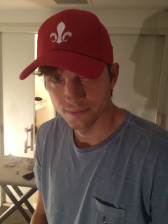

In [3]:
# load an img
img1 = cv.imread('Ashton.jpeg', 1)

# resizing imgs. to same size & display the img.
imgr1 = cv.resize(img1, None, None, 0.35, 0.35, interpolation = cv.INTER_AREA)

cv_imshow(imgr1)

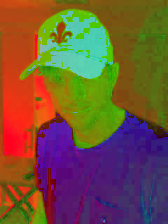

In [4]:
# convert to HSV
hsv_imgr1 = cv.cvtColor(imgr1, cv.COLOR_BGR2HSV)

# display
cv_imshow(hsv_imgr1)

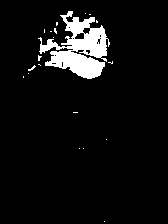

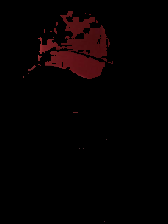

In [17]:
lower_red = np.array([70,70,70])
upper_red = np.array([255,255,255])

# incorrect
# dark_red = np.uint8([[[12,22,121]]])
# dark_red = cv.cvtColor(dark_red, cv.COLOR_BGR2HSV)

# checks if arg_2 < img.(arg_1)elements < arg_3 and sets each of them in the range to 1 rest to 0   
mask = cv.inRange(hsv_imgr1, lower_red, upper_red)
# help(cv.inRange)
cv_imshow(mask)

# display the colors from the img. at places where mask=1
mask_imgr1 = cv.bitwise_and(imgr1, imgr1, mask = mask)
cv_imshow(mask_imgr1)

# display the colors from the hsv img. at places where mask=1
# mask_imgr1 = cv.bitwise_and(hsv_imgr1, imgr1, mask = mask)
# cv_imshow(mask_imgr1)

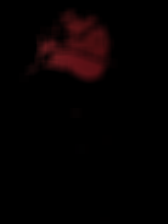

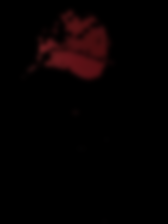

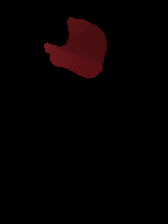

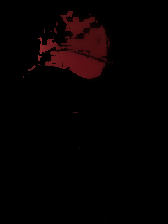

In [19]:
# create a kernel(matrix) = np.ones((h,w), dtype)/h*w
kernel = np.ones((10,10), np.float32)/100

# smooth 
smooth_imgr1 = cv.filter2D(mask_imgr1, -1, kernel)
cv_imshow(smooth_imgr1)

# blur
blur_imgr1 = cv.GaussianBlur(mask_imgr1, (15,15), 0)
cv_imshow(blur_imgr1)

# median - starting pt. + MUST TRY
median_imgr1 = cv.medianBlur(mask_imgr1, 15)
cv_imshow(median_imgr1)

# bilateral
bilateral_imgr1 = cv.bilateralFilter(mask_imgr1, 10, 70, 70)
cv_imshow(bilateral_imgr1)